In [85]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import os
import pandas as pd
import pickle

import win32com.client
outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")

# path with all mails
root_path = ""

### Clean text

In [86]:
# remove everything that are not latters
# make everything lowercase and keep root of the word
def textpreproces(Body):
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', Body)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    review = [ps.stem(word)
              for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
    return corpus[0]

### Get first mail from mailchain

In [87]:
# cut mailbody. Every massage here having whole mailchain in the body.
def cut_body(body, sender):
    bodystr = body.split(sender)[0]
    bodystr = bodystr.lower()
    with open(r'') as f:
        for message_cut_part in f:
            bodystr = bodystr.split(message_cut_part.lower())[0]
    bodystr = body[:100]
    return bodystr

### Check if PDF in attachment

In [88]:
# if PDF file in attachment then add "PDF" to the variable HasPDF.
def check_pdf(msg):
    for ItemNr in range(1, msg.Attachments.Count + 1):
        if msg.Attachments.Item(ItemNr).FileName[-3:] in ['pdf', 'PDF']:
            return True
        continue

### There are 3 folders. Each folder - label. In each folder - .msg examples

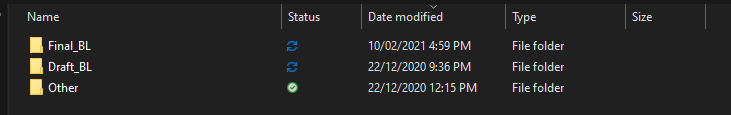

## Prepare data for training

In [89]:
# Attributes that i take into consideration
HasPDF = list()
body = list()
Subject = list()
zfrom = list()
Label = list()

In [90]:
#os.remove(r"\desktop.ini")

### Folders = Labels

In [91]:
for folder in os.listdir(root_path):
    print(folder)

Draft_BL
Final_BL
Other


In [92]:
bodystr = str()
i = 0
# for each folder (that are label) check all files inside. Files are .msg from Outlook
for folder in os.listdir(root_path):
    messeges = os.listdir(root_path + folder)
    # loop thorugh each messege in the folder
    for item in messeges:
        try:
            msg = outlook.OpenSharedItem(root_path + folder + "\\" + item)
            # Check if PDF in attachemnt
            if check_pdf(msg):
                HasPDF.append('PDF')
            # assign 0, as HasPDF needs to be the same length as others arrays in df
            else:
                HasPDF.append('0')

            bodystr = cut_body(msg.Body, msg.SenderName)
            body.append(textpreproces(bodystr))

            Subject.append(textpreproces(
                msg.Subject.replace("RE: ", "").replace("FW: ", "")))
            zfrom.append(msg.SenderName)
            Label.append(folder)
        except:
            i = i + 1
            continue
print(i)
# data = {'Subject': Subject, 'SenderName': zfrom, 'Body': body,
#         'AttachCount': HasPDF, 'Label': Label}
data = {'Body': body, 'AttachCount': HasPDF, 'Label': Label}

df = pd.DataFrame(data=data)

1


In [ ]:
df.head(5)

In [94]:
#DataSets.write_read_data().write_excel('LabledCut.xlsx', df)

### Сombine all columns into one

In [95]:
df['Total'] = df[df.columns[:-1]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [ ]:
df.head(5)

In [97]:
df.Body[1]
# bodystr = df.Body[1].split('Sara Lizzi'.lower())[0]
# print(bodystr)

'dear enclos amend draft pleas kindli confirm thank regard sara li'

# ML part

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Test model

In [99]:

# nested list. Here will be stored results from running models
results = []
   
y = df.Label.values

for cv_temp in range(15,200):
    #cv = CountVectorizer(max_features=30, stop_words='english')
    cv = CountVectorizer(max_features=cv_temp)
    X = cv.fit_transform(df.Total).toarray()
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    # loop through models and store results in the list

    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)


    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train) 

    results.append([accuracies, cv_temp])
    print(cv_temp, "swb" in cv.get_feature_names())

15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
73 True
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 True
102 True
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 True
112 True
113 True
114 True
115 True
116 True
117 True
118 True
119 True
120 True
121 True
122 True
123 True
124 True
125 True
126 True
127 True
128 True
129 True
130 True
131 True


### Check the most accurate model with particular CV

In [15]:
import matplotlib
import matplotlib.pyplot as plt

[(0.9714912280701753, 28), (0.9715538847117793, 30), (0.9715538847117793, 31), (0.9715538847117793, 35), (0.975062656641604, 39), (0.975125313283208, 36), (0.9751879699248119, 32), (0.9786967418546364, 33), (0.9822681704260651, 34), (0.9857769423558898, 38)]


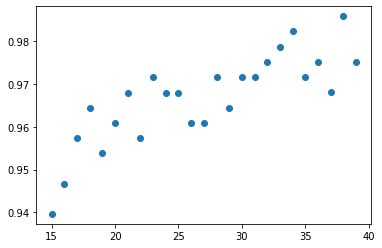

In [70]:

results_score = list()
results_cv = list()
for zlist in results:
    temp_sum = 0
    for numbers in zlist[0]:
        temp_sum += numbers
    results_score.append(temp_sum/5)
    results_cv.append(zlist[1])
matplotlib.pyplot.scatter(results_cv, results_score)
a = zip(results_score , results_cv)
b = set(a)
print(sorted(b)[-10:])



In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=61)
X = cv.fit_transform(df.Total).toarray()
y = df.Label.values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# loop through models and store results in the list
classifier = RandomForestClassifier(n_estimators=100, max_depth=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# save CV for future use
with open('Vectorizer', 'wb') as handle:
    pickle.dump(cv, handle)

### Making the Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[ 36   0   1]
 [  0  40   0]
 [  0   0 126]]
              precision    recall  f1-score   support

    Draft_BL       1.00      0.97      0.99        37
    Final_BL       1.00      1.00      1.00        40
       Other       0.99      1.00      1.00       126

    accuracy                           1.00       203
   macro avg       1.00      0.99      0.99       203
weighted avg       1.00      1.00      1.00       203



False

In [ ]:
cv.get_feature_names()

### Visualising the Training set results

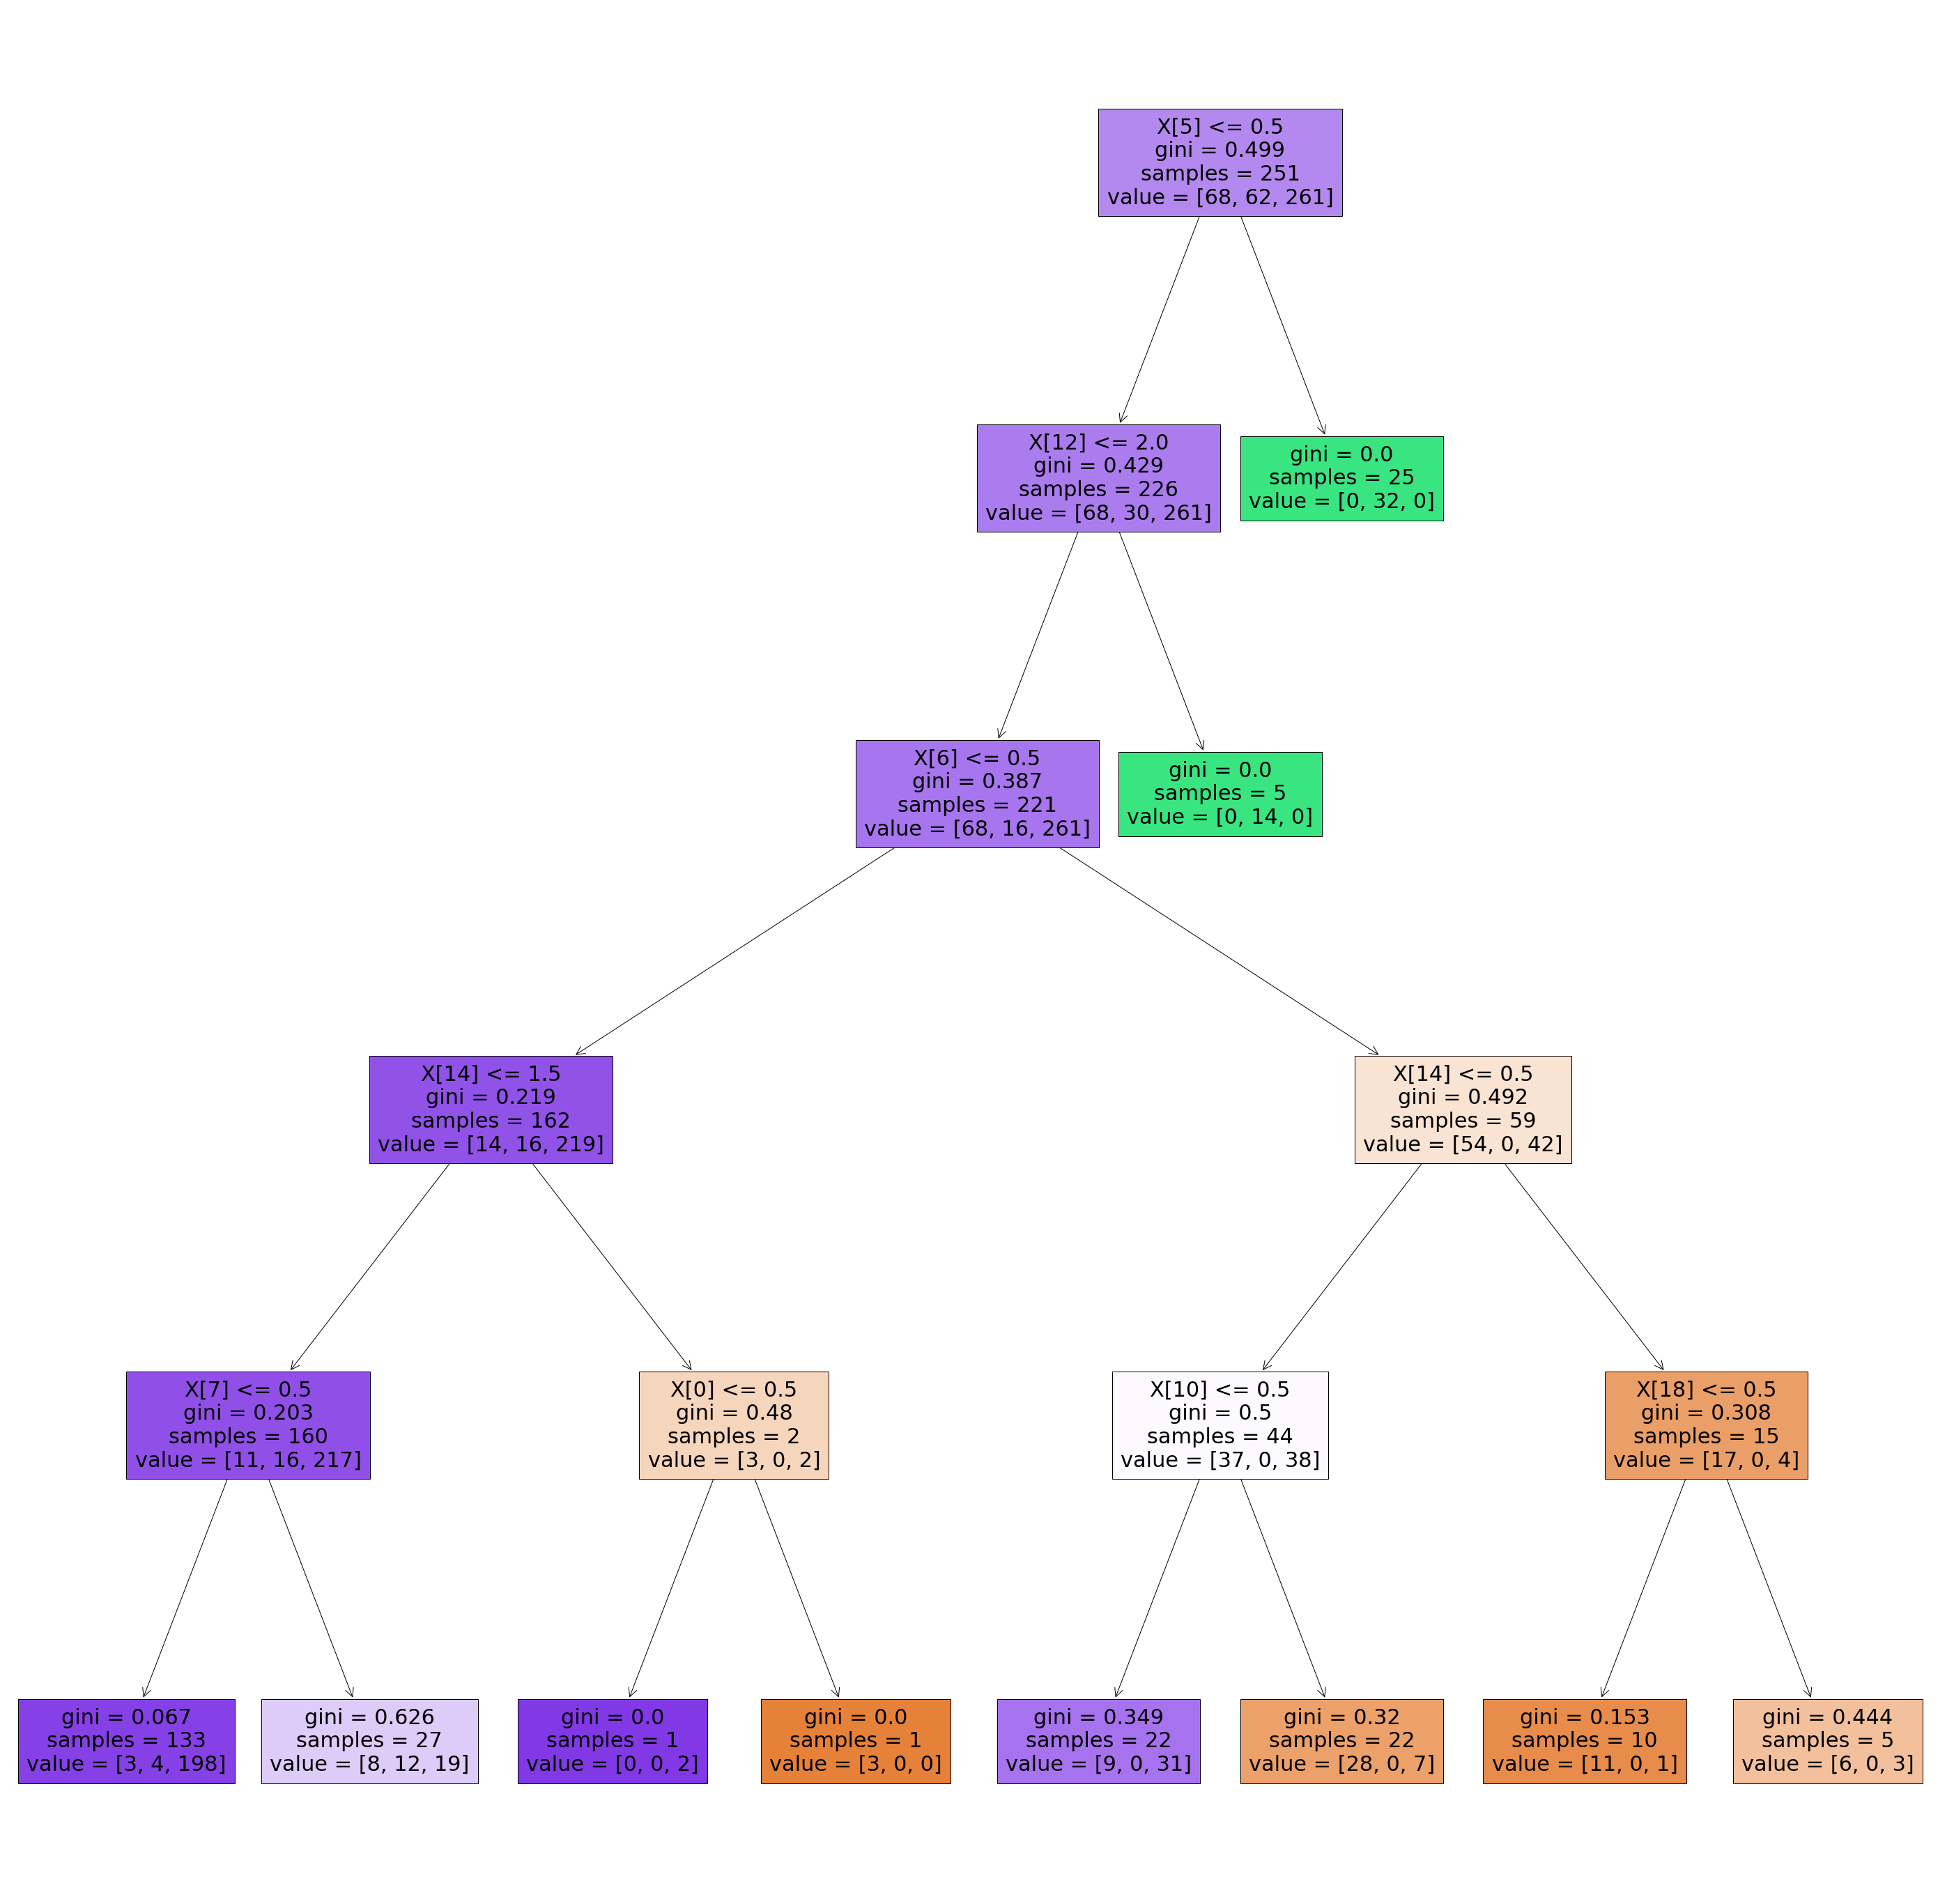

In [30]:
from sklearn import tree

plt.figure(figsize=(50,50))
_ = tree.plot_tree(classifier.estimators_[1], filled=True)

### Applying k-Fold Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train) 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.54 %
Standard Deviation: 2.88 %


In [95]:
classifier.classes_

array(['Draft_BL', 'Final_BL', 'Other'], dtype=object)

In [13]:
print("Importance of each mail attribute: ")
for name, score in zip(df.columns, classifier.feature_importances_*100):
    print(name, score)

Importance of each mail attribute: 
Body 1.498324781879195
AttachCount 6.215379750030481
Label 0.5486991314058375
Total 7.6259390179543045


### Save the model

In [81]:
with open('ML_model', 'wb') as handle:
    pickle.dump(classifier, handle)